In [257]:
### qqq

In [258]:
import time
import os
import numpy as np
import sys
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2
import ast
import stumpy
from stumpy import config
import numpy as np
import numpy.testing as npt
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [360]:
config.STUMPY_EXCL_ZONE_DENOM = 1/3  # i ± int(np.ceil(m / {1}))
plt.rcParams['font.size'] = 10
plt.rcParams["font.family"] = "Times New Roman"
plt.style.use('https://raw.githubusercontent.com/TDAmeritrade/stumpy/main/docs/stumpy.mplstyle')

In [260]:
# -------------

In [261]:
# Scan Folder and Find
def list_scan_from_path (baseDir, file_name):
    MAIN_VD_FEATURES_LX = []
    # Scan the Folder and Save the list[]
    FOLDER_CSV_SCAN = glob.iglob( baseDir + os.sep + '**' + os.sep + '*.CSV', recursive=True )
    # Order By Name
    #FOLDER_CSV_SCAN = sorted(FOLDER_CSV_SCAN)
    # Interate frame by frame
    for filename in FOLDER_CSV_SCAN:
        if (filename.find(file_name) != -1) == True:
            #print (filename)
            MAIN_VD_FEATURES_LX.append(filename)
        #
    # Return the list
    return MAIN_VD_FEATURES_LX
#<

In [262]:
# Collect the base
def collect_current_path (original_path):
    xpath = original_path.split(os.sep)
    new_path = ''
    ii=0
    for parts in xpath:
        if ii <= len(xpath)-2:
            new_path += parts + str(os.sep)
        ii += 1
    # Return
    return new_path
#<chg

In [263]:
# Collect the base
def collect_basex (original_path):
    xpath = original_path.split(os.sep)
    new_path = ''
    ii=0
    for parts in xpath:
        if ii <= len(xpath)-2:
            new_path += parts + str(os.sep)
        ii += 1
    # Return
    return new_path
#<chg

In [264]:
def plot(dt, setence, name_to_save = None, save_fig=False):
    plt.subplots(figsize=(10, 3))
    plt.suptitle(f'{setence}')
    plt.xlabel('Frame')
    plt.ylabel('Amplitude')
    plt.plot(dt, label=dt.columns)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if save_fig:
        plt.savefig(f'{name_to_save}.png')
    plt.show()

In [265]:
def check_file_exist(local_path, file_name):
    base_path = collect_basex(local_path)
    #print(base_path)
    path_test = os.path.join(base_path, file_name)
    if os.path.exists(path_test):
        return True, path_test
    else: return False, path_test

In [266]:
# Functions
# Class to manager the searches
class Comparing:
    def __init__(self, Q_df, T_df):
        self.Q_df = Q_df # referencia
        self.T_df = T_df # serie
        self.matches_idxs = [] # index das subséries mais próximas da referencia encontradas pela função match
        self.filter_matches_idxs = [] # index selecionados por similaridade entre várias medidas
        self.measure_name = None # nome da medida

    def calc_matches(self):
        self.matches_idxs = stumpy.match(self.Q_df, self.T_df, max_distance=lambda D: max(np.mean(D) - 2 * np.std(D), np.min(D)))

# Function to select the index presents in all reference measures
# The treshold demilited the distance tolerance between indexes
def find_close_values(idxs, threshold):
    close_values = []

    # Comparação entre cada par de listas
    for i in range(len(idxs)):
        for j in range(i+1, len(idxs)):
            list1 = idxs[i]
            list2 = idxs[j]

            # Comparação de cada elemento entre as duas listas
            for num1 in list1:
                for num2 in list2:
                    # Se a diferença entre os valores for menor ou igual ao threshold, considere-os próximos
                    if abs(num1 - num2) <= threshold:
                        close_values.append(min(num1,num2))
                        
    close_values = set(close_values)
    return close_values

def find_all_matches(list_of_index, threshold):
    n = len(list_of_index)
    list_aux = []
    if n <= 1:  
        return list_of_index
    else: 
        #seleciona o primeiro e segundo elemento da lista para a busca de similaridade
        list_aux.append(list_of_index.pop(0))
        list_aux.append(list_of_index.pop(0))
        result = find_close_values(list_aux, threshold)
        list_of_index.insert(0, result)
        return find_all_matches(list_of_index, threshold)

In [267]:
# ---------------

In [268]:
# Variables
# Base Dir ../Dataset
baseDir = os.path.join('..', 'Dataset')

In [269]:
#
## Seach pacth of MEASURE files
MAIN_LIST_MEASURE = []

In [270]:
# File_name to find
MEASURE_FILE_PATH = 'VD_WORDS_OCCURRENCE.CSV'

########## - Find only in DD-Local and - YT
# Break 1 - Exclude the Folder of References
# Variables
# B1.1 - Collect in DD-Local
#baseDir_local = os.path.join(baseDir, 'DD-Local')
# Call the basic function
#MAIN_LIST_MEASURE_local = list_scan_from_path (baseDir_local, MEASURE_FILE_PATH)
MAIN_LIST_MEASURE_local = []
# Variables
# B1.2 - Collect in YT
baseDir_yt = os.path.join(baseDir, 'YT-Online')
# Call the basic function
MAIN_LIST_MEASURE_yt = list_scan_from_path (baseDir_yt, MEASURE_FILE_PATH)

# Join the Two Lists
MAIN_LIST_MEASURE = MAIN_LIST_MEASURE_local + MAIN_LIST_MEASURE_yt

In [271]:
#MAIN_LIST_MEASURE

In [272]:
SUB_FILE_NAME = 'VD_SUBTITLES.CSV'
MAIN_LIST_MEASURE_FILTER = []
for current_path in MAIN_LIST_MEASURE:
    path = collect_basex(current_path)
    check, _ = check_file_exist(path, SUB_FILE_NAME)
    if check:
        MAIN_LIST_MEASURE_FILTER.append(current_path)  

In [273]:
MAIN_LIST_MEASURE_FILTER

['..\\Dataset\\YT-Online\\VD_Y_0000000001\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000002\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000003\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000004\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000005\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000006\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000007\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000008\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000009\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000011\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000012\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000013\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000014\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_0000000015\\VD_WORDS_OCCURRENCE.CSV',
 '..\\Dataset\\YT-Online\\VD_Y_000

## Reading all Word Occurrence files

In [274]:
# Select the time-serie
VD_INFO_DT = 'VD_INFO.CSV'
TOTAL = pd.DataFrame()
for current_path in MAIN_LIST_MEASURE_FILTER:
    path_dir = collect_current_path(current_path)
    vd_info_path = os.path.join(path_dir, VD_INFO_DT)
    
    vd_info = pd.read_csv(vd_info_path)
    vd_info.drop(columns=['Unnamed: 0'], inplace=True)
    video_id =  vd_info.video_id[0]
    
    try:
        VD_WORDS_OCCURRENCE = pd.read_csv(current_path)
        if 'Unnamed: 0' in VD_WORDS_OCCURRENCE.columns:
            VD_WORDS_OCCURRENCE.drop(columns=['Unnamed: 0'], inplace=True)
            
        VD_WORDS_OCCURRENCE.insert(0, 'video_id', video_id)
        #VD_WORDS_OCCURRENCE['video_id'] = video_id
        TOTAL = pd.concat([TOTAL, VD_WORDS_OCCURRENCE])
        if VD_WORDS_OCCURRENCE.empty:
            print("O arquivo CSV está vazio.", current_path)
    except pd.errors.EmptyDataError:
        print("O arquivo CSV está vazio.", current_path)       

O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000001\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000003\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000012\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000017\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000018\VD_WORDS_OCCURRENCE.CSV
O arquivo CSV está vazio. ..\Dataset\YT-Online\VD_Y_0000000022\VD_WORDS_OCCURRENCE.CSV


## Setting word to carry out the search flow

In [275]:
# TYPE WORD IN CAPS LOCK
word ='PRESENTATION'
FILTER = TOTAL[TOTAL['selected_word'] == word]
print(f'The Word "{word}" has {len(FILTER)} occurrence')

The Word "PRESENTATION" has 17 occurrence


In [276]:
# Count word frequency in each video

In [277]:
count_id = FILTER.video_id.value_counts()
FREQUENCY_DT = pd.DataFrame({'video_id': count_id.index, 'amount': count_id.values})

In [278]:
FREQUENCY_DT

,video_id,amount
0,37,6
1,11,5
2,31,4
3,6,1
4,8,1


In [279]:
# setting video_id to show the setences in subtitle
video_id = 11
FILTER_ID = FILTER.query(f'video_id=={video_id}')
FILTER_ID = FILTER_ID.rename_axis('id_sentence')
FILTER_ID 

,video_id,selected_word,start_time_seconds,end_time_seconds,ini_frame,end_frame,text
id_sentence,,,,,,,
0,11,PRESENTATION,3.179,7.410,76,178,PRESENTATION AND I TALKED ABOUT THE
1,11,PRESENTATION,22.800,26.580,546,638,PRESENTATION SKILLS I'LL TEACH YOU HOW
2,11,PRESENTATION,122.040,125.729,2926,3015,GIVING THE PRESENTATION OF WHY I'M
3,11,PRESENTATION,162.500,167.060,3896,4006,SECTIONS OF THAT PRESENTATION TO GIVE
4,11,PRESENTATION,191.060,195.769,4580,4694,YOUR PRESENTATION IS LESS THAN 60


## Plotting a time-serie setence

In [280]:
# Type the setence index
id_sentence = 1
# Select the sentence
FILTER_ID.loc[id_sentence]

video_id                                                  11
selected_word                                   PRESENTATION
start_time_seconds                                      22.8
end_time_seconds                                       26.58
ini_frame                                                546
end_frame                                                638
text                  PRESENTATION SKILLS I'LL TEACH YOU HOW
Name: 1, dtype: object

In [281]:
##
# READ VD BLOCKS_WORDS
# generate the path of the video in dataset
VD_BLOCKS_FILE_NAME = 'VD_BLOCKS_WORDS_OCCURRENCE.CSV'
path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_BLOCKS_FILE_NAME)
VD_BLOCKS_WORDS = pd.read_csv(path_video)

In [282]:
VD_BLOCKS_WORDS_FILTER = VD_BLOCKS_WORDS.query(f'block_id=={id_sentence}').reset_index(drop=True)

# Check if there is a discontinuity in the sentence
if VD_BLOCKS_WORDS_FILTER.loc[1:,'gap'].any()==1:
    print('A time series exhibits a discontinuity. Choose another sentence.')
else:
    print('The time series does not exhibit a discontinuity. Proceed with the flow.')

The time series does not exhibit a discontinuity. Proceed with the flow.


In [283]:
#VD_BLOCKS_WORDS_FILTER

In [284]:
# show measures mouth dataframe
SENTENCE_DT = VD_BLOCKS_WORDS_FILTER.iloc[:,[2] + list(range(7, 23))]
SENTENCE_DT = SENTENCE_DT.set_index(pd.Index(SENTENCE_DT['frame_raw']))
SENTENCE_DT.drop(columns=["frame_raw"], inplace=True)
SENTENCE_DT

,m1,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17
frame_raw,,,,,,,,,,,,,,,,
546,21.000000,106.000000,13.000000,32.000000,30.016662,33.000000,40.049969,106.018866,74.027022,63.5,62.0,62.0,22.0,44.0,9.0,9.0
547,6.082763,108.004630,14.000000,27.000000,27.000000,29.017236,47.010637,94.000000,67.000000,64.0,60.0,59.0,12.5,34.5,6.5,0.5
548,3.162278,107.018690,13.000000,21.023796,26.000000,28.000000,50.009999,87.005747,66.000000,64.5,58.0,60.0,9.0,28.0,6.0,2.0
549,2.236068,109.004587,15.000000,23.021729,28.000000,30.000000,47.010637,87.005747,64.000000,63.0,57.0,58.0,10.5,29.5,4.5,2.5
550,14.000000,111.004504,15.033296,30.016662,29.000000,32.015621,44.011362,103.004854,73.000000,66.0,59.0,60.0,15.5,43.5,11.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,24.000000,114.039467,14.000000,30.000000,32.000000,36.013886,42.047592,110.018180,80.024996,68.0,58.0,61.0,17.5,50.5,17.5,4.5
635,21.023796,114.017543,14.000000,32.000000,32.015621,35.014283,41.012193,108.000000,76.000000,65.5,59.0,61.0,19.0,48.0,13.0,6.0
636,11.401754,108.018517,13.000000,30.016662,29.000000,31.016125,47.000000,101.079177,71.063352,65.5,61.0,59.0,13.0,41.0,9.0,1.0


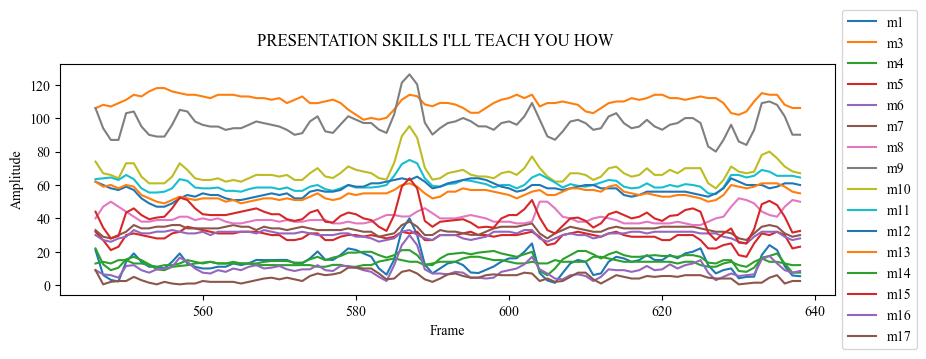

In [285]:
#plot graph
plot(SENTENCE_DT, FILTER_ID.loc[id_sentence].text)

In [286]:
SENTENCE_DT

,m1,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,m14,m15,m16,m17
frame_raw,,,,,,,,,,,,,,,,
546,21.000000,106.000000,13.000000,32.000000,30.016662,33.000000,40.049969,106.018866,74.027022,63.5,62.0,62.0,22.0,44.0,9.0,9.0
547,6.082763,108.004630,14.000000,27.000000,27.000000,29.017236,47.010637,94.000000,67.000000,64.0,60.0,59.0,12.5,34.5,6.5,0.5
548,3.162278,107.018690,13.000000,21.023796,26.000000,28.000000,50.009999,87.005747,66.000000,64.5,58.0,60.0,9.0,28.0,6.0,2.0
549,2.236068,109.004587,15.000000,23.021729,28.000000,30.000000,47.010637,87.005747,64.000000,63.0,57.0,58.0,10.5,29.5,4.5,2.5
550,14.000000,111.004504,15.033296,30.016662,29.000000,32.015621,44.011362,103.004854,73.000000,66.0,59.0,60.0,15.5,43.5,11.5,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,24.000000,114.039467,14.000000,30.000000,32.000000,36.013886,42.047592,110.018180,80.024996,68.0,58.0,61.0,17.5,50.5,17.5,4.5
635,21.023796,114.017543,14.000000,32.000000,32.015621,35.014283,41.012193,108.000000,76.000000,65.5,59.0,61.0,19.0,48.0,13.0,6.0
636,11.401754,108.018517,13.000000,30.016662,29.000000,31.016125,47.000000,101.079177,71.063352,65.5,61.0,59.0,13.0,41.0,9.0,1.0


## Identifying the word sequence in the sentence time series

In [429]:
# o frame de início e fim foi encontrado a partir de análise visual e auditiva do vídeo
frame_begin = 549
#frame_end = 568
frame_end = frame_begin+19

#WORD_DT = SENTENCE_DT.query(f'frame_seq >= {frame_begin} & frame_seq <= {frame_end}')
WORD_DT = SENTENCE_DT.query(f'frame_raw >= {frame_begin} & frame_raw <= {frame_end}')

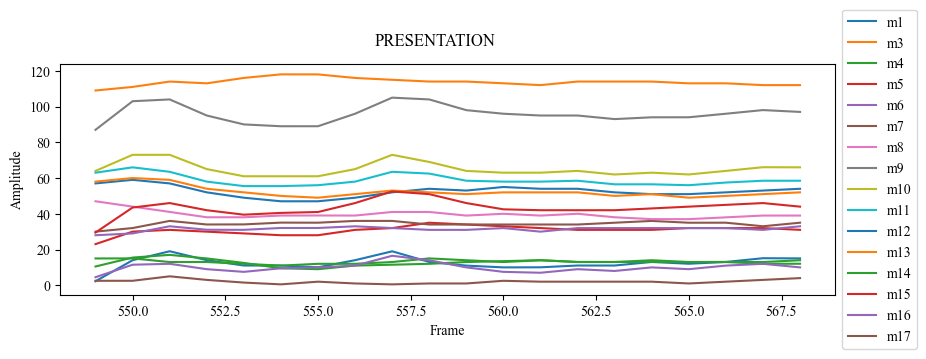

In [430]:
plot(WORD_DT, word)

## Analysis of variability in measurements of the selected word.

In [431]:
VD_MEASURE_DT_SUMARY =  WORD_DT.describe().T
VD_MEASURE_DT_SUMARY = VD_MEASURE_DT_SUMARY[['mean', 'std', 'min', 'max']]

# coefficient of variation
VD_MEASURE_DT_SUMARY['CV (%)'] = (VD_MEASURE_DT_SUMARY['std']/VD_MEASURE_DT_SUMARY['mean']) * 100
VD_MEASURE_DT_SUMARY.sort_values(by='CV (%)', ascending=False)

,mean,std,min,max,CV (%)
m17,2.050000,1.134391,0.500000,5.000000,55.336128
m1,12.446887,3.557792,2.236068,19.026298,28.583791
m16,9.950000,2.610203,4.500000,16.500000,26.233193
m14,12.850000,1.933772,9.000000,17.000000,15.048808
m15,43.400000,4.601487,29.500000,52.500000,10.602505
m4,13.063090,1.102949,11.000000,15.033296,8.443245
m5,30.804369,2.521669,23.021729,35.000000,8.186074
m10,65.108016,3.919763,61.000000,73.006849,6.020400
m12,52.600000,3.152276,47.000000,59.000000,5.992920
m8,39.669730,2.364760,37.000000,47.010637,5.961118


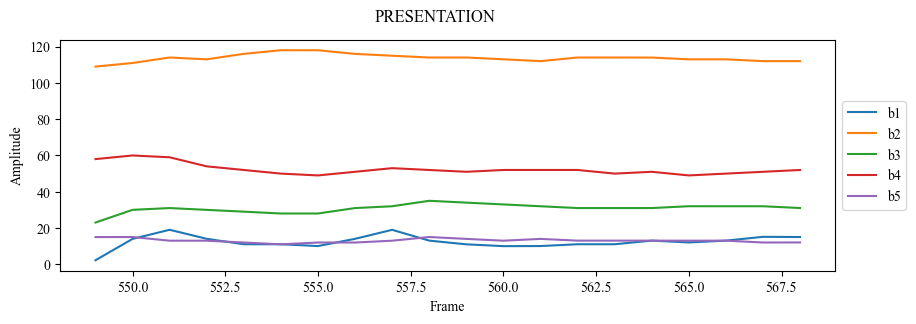

In [518]:
# select best measures to search
#reference_measures = ['m4', 'm5']

new_measures = {'m1': 'b1', 
             'm3': 'b2',
             'm5': 'b3',
             'm13': 'b4',
             'm4': 'b5'}

reference_measures = ['b1', 'b2', 'b3', 'b4', 'b5']

WORD_DT = WORD_DT.rename(columns=new_measures)
PLOT_DT = WORD_DT[reference_measures]
#def plot(dt, title, name_to_save = None, save_fig=False):
plot(PLOT_DT, word, f'{word}_word', save_fig=True)

## Searching word in the sentence

In [503]:
# set the seed
Q_df = WORD_DT[reference_measures]
# set the time-serie
T_df = SENTENCE_DT[reference_measures]

In [504]:
# Busca os padrões na série
c_list = []
for step in range(0,len(Q_df.columns)):
    comp_object = Comparing(Q_df[reference_measures[step]], T_df[reference_measures[step]])
    comp_object.calc_matches()
    comp_object.measure_name = reference_measures[step]
    c_list.append(comp_object)

print('Results:')
for c in c_list:
    print(c.measure_name, '-', len(c.matches_idxs), c.matches_idxs)

Results:
m4 - 1 [[0.0 3]]
m5 - 1 [[0.0 3]]


In [505]:
##
# Tratamento do resultado
#
# Salva os resultados encontrado em all_index
all_index = []
for c in c_list:  
    all_index.append(c.matches_idxs[:, 1])
# filtra por coincidência a partir de um um treshold de distancia entre a posição dos indexs
threshold = 10
aux = all_index.copy()
filter_index = find_all_matches(aux, threshold)

# Converte os frames encontrados de acordo com o frame_seq original da sentença
filter_index_list=list(filter_index[0])
filter_index_begin = []
for idx in filter_index_list:
    filter_index_begin.append(idx)
idxs_match_frame_seq = list(T_df.iloc[filter_index_begin].index)

print('total de ocorrências:', len(idxs_match_frame_seq))
print('frames de início:', idxs_match_frame_seq)

total de ocorrências: 1
frames de início: [549]


## Busca em todo o vídeo

In [506]:
##
# READ VD MEASURES
# generate the path of the video in dataset
VD_MEASURE_FILE_NAME = 'VD_MEASURE_L0.CSV'
path_video = os.path.join(baseDir_yt, f'VD_Y_{video_id:010d}', VD_MEASURE_FILE_NAME)
VD_MEASURE_DT = pd.read_csv(path_video)
VD_MEASURE_DT.drop(columns=["Unnamed: 0"], inplace=True)

In [507]:
# set the seed
Q_df = WORD_DT[reference_measures]
# set the time-serie
T_df = VD_MEASURE_DT[reference_measures]

In [508]:
# Busca os padrões na série
c_list = []
for step in range(0,len(Q_df.columns)):
    comp_object = Comparing(Q_df[reference_measures[step]], T_df[reference_measures[step]])
    comp_object.calc_matches()
    comp_object.measure_name = reference_measures[step]
    c_list.append(comp_object)

print('Results:')
for c in c_list:
    print(c.measure_name, '-', len(c.matches_idxs))

Results:
m4 - 44
m5 - 47


In [509]:
##
# Tratamento do resultado
#
# Salva os resultados encontrado em all_index
all_index = []
for c in c_list:  
    all_index.append(c.matches_idxs[:, 1])
# filtra por coincidência a partir de um um treshold de distancia entre a posição dos indexs
threshold = 1
aux = all_index.copy()
filter_index = find_all_matches(aux, threshold)

# Converte os frames encontrados de acordo com o frame_seq original da sentença
filter_index_list=list(filter_index[0])
filter_index_begin = []
for idx in filter_index_list:
    filter_index_begin.append(idx)
idxs_match_frame_seq = list(VD_MEASURE_DT.loc[filter_index_begin, 'frame_seq'].values)

print('total de ocorrências:', len(idxs_match_frame_seq))
#print('frames de início convertidos (frame_raw):', filter_index_list)
print('frames de início convertidos (frame_seq):', idxs_match_frame_seq)

total de ocorrências: 4
frames de início convertidos (frame_seq): [4582, 549, 79, 631]


In [493]:
FILTER_ID

,video_id,selected_word,start_time_seconds,end_time_seconds,ini_frame,end_frame,text
id_sentence,,,,,,,
0,11,PRESENTATION,3.179,7.410,76,178,PRESENTATION AND I TALKED ABOUT THE
1,11,PRESENTATION,22.800,26.580,546,638,PRESENTATION SKILLS I'LL TEACH YOU HOW
2,11,PRESENTATION,122.040,125.729,2926,3015,GIVING THE PRESENTATION OF WHY I'M
3,11,PRESENTATION,162.500,167.060,3896,4006,SECTIONS OF THAT PRESENTATION TO GIVE
4,11,PRESENTATION,191.060,195.769,4580,4694,YOUR PRESENTATION IS LESS THAN 60


In [411]:
# Abrir um arquivo para escrita ('w')
with open(f'{word}_RESULTADOS.txt', 'w') as arquivo:
    # Escrever no arquivo
    arquivo.write('palavra: '+ word+ '\n')
    arquivo.write('video_id: '+ str(video_id)+ '\n')
    arquivo.write('frame_begin: ' + str(frame_begin)+ '\n')
    arquivo.write('frame_end: ' + str(frame_end)+ '\n')
    arquivo.write('total de ocorrências: ' + str(len(idxs_match_frame_seq))+ '\n')
    arquivo.write('frames de início: ' + str(idxs_match_frame_seq))

In [514]:
# Sua lista maior de palavras
lista_maior = ['apple', 'banana', 'pear', 'a', 'by', 'the', 'orange', 'an', 'kiwi', 'but']
lista_maior = [st_w.upper() for st_w in lista_maior]
# Lista de stop words
stop_words = ['a', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'for', 'if', 'in', 'into', 
    'is', 'it', 'no', 'not', 'of', 'on', 'or', 'such', 'that', 'the', 'their', 'then', 'these', 
    'they', 'this', 'to', 'was', 'will', 'with', 'i', "i'm", 'am', 'you',  "they're", 'your', 'out', 'my','...', '.']

stop_words = [st_w.upper() for st_w in stop_words]

# Substituir todas as stop words por 'SW' na lista maior
lista_maior_substituida = ['SW' if palavra in stop_words else palavra for palavra in lista_maior]

print(lista_maior_substituida)

['APPLE', 'BANANA', 'PEAR', 'SW', 'SW', 'SW', 'ORANGE', 'SW', 'KIWI', 'SW']


In [300]:
#<end